In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

session = Session(engine)
Base.classes.keys()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [64]:
# Find the most recent date in the data set.


In [9]:
# Returns correct data, just not in the same format
most_recent = session.query(measurement).order_by(measurement.date.desc()).first()
print(most_recent.date)


2017-08-23


In [10]:
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [11]:
import datetime as dt

# find desired date, one year before last date: date = dt.datetime(2017, 8, 23)
year_ago = dt.datetime(2017, 8, 23) - dt.timedelta(days=365)
print(year_ago)    


2016-08-23 00:00:00


In [40]:
# setting date
# date = dt.datetime('2016, 8, 23')
# query to retrieve data and filter,sort the dataframe by date
results = session.query(measurement.prcp,
                              measurement.date).\
                        filter(measurement.date > '2016-08-22').order_by(measurement.date).all()
                       
# list comprehension, explicitly sets the column names
rain_drops = [{"Date": result[1], "precipitation": result[0]} for result in results]
rain_drops

[{'Date': '2016-08-23', 'precipitation': 0.0},
 {'Date': '2016-08-23', 'precipitation': 0.15},
 {'Date': '2016-08-23', 'precipitation': 0.05},
 {'Date': '2016-08-23', 'precipitation': None},
 {'Date': '2016-08-23', 'precipitation': 0.02},
 {'Date': '2016-08-23', 'precipitation': 1.79},
 {'Date': '2016-08-23', 'precipitation': 0.7},
 {'Date': '2016-08-24', 'precipitation': 0.08},
 {'Date': '2016-08-24', 'precipitation': 2.15},
 {'Date': '2016-08-24', 'precipitation': 2.28},
 {'Date': '2016-08-24', 'precipitation': None},
 {'Date': '2016-08-24', 'precipitation': 1.22},
 {'Date': '2016-08-24', 'precipitation': 2.15},
 {'Date': '2016-08-24', 'precipitation': 1.45},
 {'Date': '2016-08-25', 'precipitation': 0.08},
 {'Date': '2016-08-25', 'precipitation': 0.08},
 {'Date': '2016-08-25', 'precipitation': 0.0},
 {'Date': '2016-08-25', 'precipitation': 0.0},
 {'Date': '2016-08-25', 'precipitation': 0.21},
 {'Date': '2016-08-25', 'precipitation': 0.06},
 {'Date': '2016-08-25', 'precipitation': 0.1

In [41]:
# Save the query results as a Pandas DataFrame. 
df = pd.DataFrame(rain_drops, columns=['Date', 'precipitation']).dropna()
df.set_index('Date', inplace=True)
df

,precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


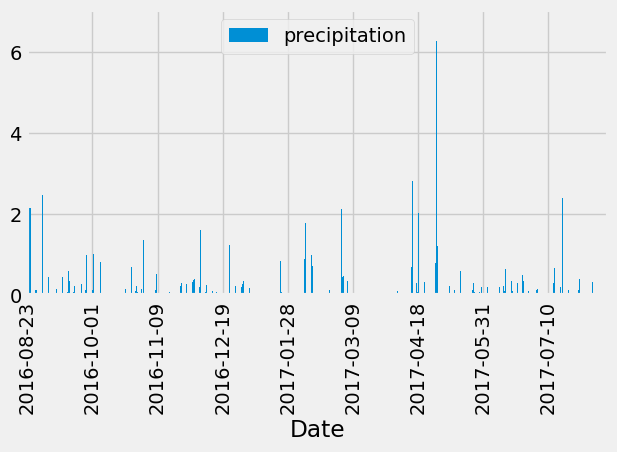

In [73]:
chart_df = df[df['precipitation']>0]
chart_df = pd.DataFrame(rain_drops, columns=['Date', 'precipitation'])
chart_df.set_index('Date', inplace=True)
chart_df.plot.bar()

# plt.grid()
# plt.xticks(ticks=None, labels=None, *, minor=False, **kwargs)
plt.xticks(np.arange(0, 2250, 250), ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18', '2017-05-31', 
  '2017-07-10'])
# plt.ylim(0, 7)
plt.tight_layout()

plt.show()

Text(0, 0.5, 'Inches')

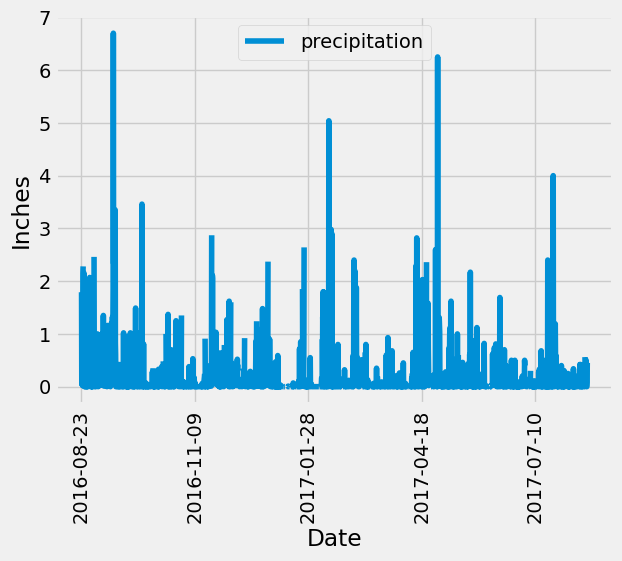

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [69]:
# Use Pandas to calculate the summary statistics for the precipitation data
df[["precipitation"]].describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
session.query(station.station).count()

9

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [17]:
session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# sel = [(measurement.station),
#     func.min(measurement.tobs), 
#        func.max(measurement.tobs), 
#        func.avg(measurement.tobs)]
# most_active = session.query(*sel).\
#     filter(measurement.station == 'USC00519281').\
#     order_by(func.min(measurement.tobs), 
#        func.max(measurement.tobs), 
#        func.avg(measurement.tobs))
# print(most_active)
session.query(func.min(measurement.tobs), 
              func.max(measurement.tobs), 
              func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

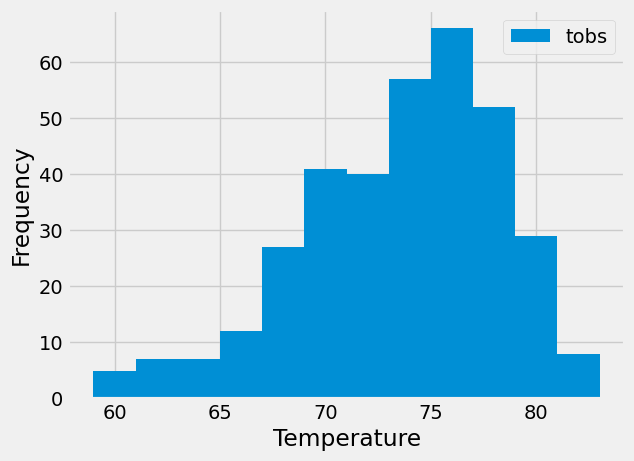

In [35]:
# frquent_temps = session.query(measurement.tobs).\
#                 filter(frquent_temps).\
#                 filter(measurement.date > '2016-08-23').all()
# sel = [measurement.tobs, func.count(measurement.tobs)]
# frquent_temps = session.query(*sel).filter(measurement.date > '2016-08-23').filter(measurement.station == 'USC00519281').all()
# session.query(Dow.date, Dow.close_price).\
#     filter(Dow.stock == 'CSCO').\
#     filter(Dow.date == query_date).all()
results = session.query(measurement.tobs).\
                        filter(measurement.date > '2016-08-23').filter(measurement.station == 'USC00519281').all()
                       

tobs = pd.DataFrame(result for result in results)
tobs

plt.hist(tobs, bins=12)
plt.legend(tobs)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 4.183333333333314, 'Temperature')

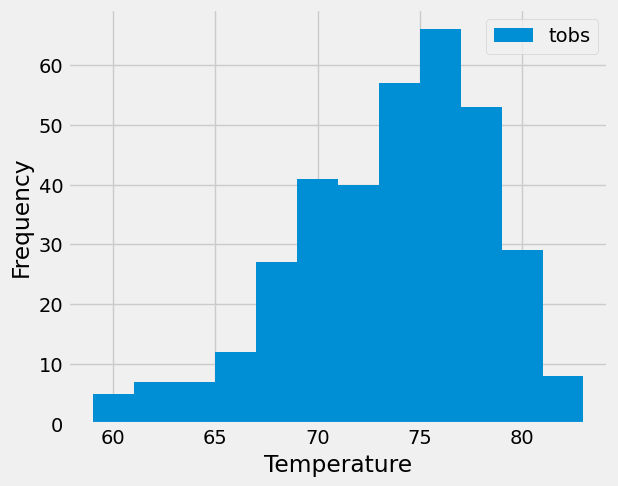

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [60]:
# Close Session
session.close()